# Power Apparatus and System Design
----
## Assignment 1 -- Part 1

In [1]:
# Importing pandas library
import pandas as pd 
# Makes our plot appear in notebook
%matplotlib inline
# Importing pyplot library
import matplotlib.pyplot as plt
# Setting display limitations for pandas dataframe
pd.set_option('display.width', 500) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
# Importing Seaborn library
import seaborn as sns
# Setting Seaborn Parameters
sns.set_style("whitegrid") 
sns.set_context("poster")

In [2]:
# Order of columns according to input data
names=['Branch No.', 'Sending Node(S)', 'Recieving Node(R)', 'Branch Resistance(Ohm)',
       'Branch Reactance(Ohm)', 'Active Power(kW)', 'Reactive Power(kVar)'] 
# Reading input data in the form of csv
data = pd.read_csv('data1.csv', names=names) 
data

,Branch No.,Sending Node(S),Recieving Node(R),Branch Resistance(Ohm),Branch Reactance(Ohm),Active Power(kW),Reactive Power(kVar)
0,10,9,0.000001,10.0000,23.0000,100.0,NaN
1,1,1,2.000000,0.1233,0.4127,1840.0,460.0
2,2,2,3.000000,0.0140,0.6051,980.0,340.0
3,3,3,4.000000,0.7463,1.2050,1790.0,446.0
4,4,4,5.000000,0.6984,0.6084,1598.0,1840.0
5,5,5,6.000000,1.9831,1.7276,1610.0,600.0
6,6,6,7.000000,0.9053,0.7886,780.0,110.0
7,7,7,8.000000,2.0552,1.1640,1150.0,60.0
8,8,8,9.000000,4.7953,2.7160,980.0,130.0
9,9,9,10.000000,5.3434,3.0264,1640.0,200.0


In [3]:
params = data[0:1] # First row of input csv file i.e. Base Parameters
data = data[1:] # Discarding first row of data from dataframe
Nbus = params.iloc[0, 0] #Total Number of Buses in the System
Nbranch = params.iloc[0, 1] # Total Number of Branches in the System
e = params.iloc[0, 2] # Maximum allowed error
imax = int(params.iloc[0, 3]) # Maximum Number of iterations
Vb = params.iloc[0, 4] # Vbase(kV) for the System
Sb = params.iloc[0, 5] # Sbase(MVA) for the System
Zb = Vb*Vb/Sb # Zbase for the System
print('Number of Buses: ', Nbus, '\nNumber of Branches: ', Nbranch,
     '\nMaximum allowed error: ', e, '\nMaximum numbers of iterations: ', imax,
     '\nVbase(kV) for the System: ', Vb, '\nSbase(MVA) for the System: ', Sb,
     '\nZbase for the System(Ohm) : ', Zb)

Number of Buses:  10.0 
Number of Branches:  9.0 
Maximum allowed error:  1e-06 
Maximum numbers of iterations:  10 
Vbase(kV) for the System:  23.0 
Sbase(MVA) for the System:  100.0 
Zbase for the System(Ohm) :  5.29


In [4]:
# Multiplying Sb with 1000 to match dimensions
data[['kW(p.u.)', 'kVar(p.u.)']] = data[['Active Power(kW)', 'Reactive Power(kVar)']] / (Sb*1000)
# R(p.u.) = R/Zbase
data[['R(p.u.)', 'X(p.u.)']] = data[['Branch Resistance(Ohm)', 'Branch Reactance(Ohm)']] / Zb 
# Changing column Recieving Node to int type.
data['Recieving Node(R)'] = data['Recieving Node(R)'].astype(int) 
data

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Branch No.,Sending Node(S),Recieving Node(R),Branch Resistance(Ohm),Branch Reactance(Ohm),Active Power(kW),Reactive Power(kVar),kW(p.u.),kVar(p.u.),R(p.u.),X(p.u.)
1,1,1,2,0.1233,0.4127,1840.0,460.0,0.01840,0.00460,0.023308,0.078015
2,2,2,3,0.0140,0.6051,980.0,340.0,0.00980,0.00340,0.002647,0.114386
3,3,3,4,0.7463,1.2050,1790.0,446.0,0.01790,0.00446,0.141078,0.227788
4,4,4,5,0.6984,0.6084,1598.0,1840.0,0.01598,0.01840,0.132023,0.115009
5,5,5,6,1.9831,1.7276,1610.0,600.0,0.01610,0.00600,0.374877,0.326578
6,6,6,7,0.9053,0.7886,780.0,110.0,0.00780,0.00110,0.171134,0.149074
7,7,7,8,2.0552,1.1640,1150.0,60.0,0.01150,0.00060,0.388507,0.220038
8,8,8,9,4.7953,2.7160,980.0,130.0,0.00980,0.00130,0.906484,0.513422
9,9,9,10,5.3434,3.0264,1640.0,200.0,0.01640,0.00200,1.010095,0.572098


In [5]:
# Initializing empty dataframe for performing calculations
calculations = pd.DataFrame() 
# Plucking out relevant columns from data
calculations = data[['Branch No.', 'Sending Node(S)', 'Recieving Node(R)']]
# Initializing Sending end  and Recieving end Node voltages with 1+0j
calculations.insert(loc = calculations.shape[1], column='Sv', value = complex(1, 0)) 
calculations.insert(loc = calculations.shape[1], column='Rv', value = complex(1, 0))
# Initializing Branch Current column(I).
calculations.insert(loc = calculations.shape[1], column='I', value = None)
# Plucking out Resistance, Reactance, Active Power(p.u.), Reactive Power(p.u.) from the dataframe
calculations[['R(p.u.)', 'X(p.u.)', 'kW(p.u.)', 'kVar(p.u.)']] = data[['R(p.u.)', 'X(p.u.)', 'kW(p.u.)', 'kVar(p.u.)']]
calculations

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Branch No.,Sending Node(S),Recieving Node(R),Sv,Rv,I,R(p.u.),X(p.u.),kW(p.u.),kVar(p.u.)
1,1,1,2,(1+0j),(1+0j),None,0.023308,0.078015,0.01840,0.00460
2,2,2,3,(1+0j),(1+0j),None,0.002647,0.114386,0.00980,0.00340
3,3,3,4,(1+0j),(1+0j),None,0.141078,0.227788,0.01790,0.00446
4,4,4,5,(1+0j),(1+0j),None,0.132023,0.115009,0.01598,0.01840
5,5,5,6,(1+0j),(1+0j),None,0.374877,0.326578,0.01610,0.00600
6,6,6,7,(1+0j),(1+0j),None,0.171134,0.149074,0.00780,0.00110
7,7,7,8,(1+0j),(1+0j),None,0.388507,0.220038,0.01150,0.00060
8,8,8,9,(1+0j),(1+0j),None,0.906484,0.513422,0.00980,0.00130
9,9,9,10,(1+0j),(1+0j),None,1.010095,0.572098,0.01640,0.00200


In [6]:
# Function for finding sequences
def sequence_finder(calculations, index=0, l=None, Sequence = []):
    if l is None:
        l = []
    l.append(calculations.iloc[index, 0]) # Appending Branch No. from index'th row
    R = calculations.iloc[index, 2] # Recieving End Node of index'th row
    x = calculations.loc[calculations['Sending Node(S)']==R] # Dataframe with all the rows where S == R
    for i in range(x.shape[0]):
        if i == 0:
            sequence_finder(calculations, index=x.index.values[0] - 1, l=l, Sequence = Sequence)
        else: # If there is more than one Branch then removing later ones into another sequences
            sequence_finder(calculations, index=x.index.values[i] - 1, Sequence = Sequence)
    if x.shape[0] == 0: # If no Branches are found terminate by adding found sequence into Global Variable.
        Sequence.append(l)
    return Sequence

In [7]:
Sequence = sequence_finder(calculations)
for i in range(len(Sequence)):
    Sequence[i] = Sequence[i][::-1] # Reversing the sequences Useful later on
print(Sequence)

[[9, 8, 7, 6, 5, 4, 3, 2, 1]]


In [8]:
def current_calculator(calculations, Sequence, Inow = None):
    joints = [] # Empty array to store where one sequence joins other sequence
    if Inow is None:
        Inow = complex(0, 0)
    for i in range(1,len(Sequence)):
        joints.append(Sequence[i][-1])
    for i in range(len(Sequence)):
        for j in Sequence[i]:
            if j in joints:
                NewSequence = []
                s = calculations.loc[calculations['Branch No.']==j]
                index = s.index.values[0] - 1
                Itemp = complex(calculations.iloc[index, 8], 
                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 4].conjugate()
                Inow = Inow + Itemp
                calculations.iloc[index, 5] = Inow
                S = s.iloc[0, 1] # Sending end Node of j branch
                # Finding the row where R is equal to S of j branch
                b = calculations.loc[calculations['Recieving Node(R)']==S] 
                # Branch before j branch
                B = b.iloc[0, 0]
                for l in range(len(Sequence)):
                    if B in Sequence[l]:
                        NewSequence.append(Sequence[l])
                for i in range(len(NewSequence)):
                    if B in NewSequence[i]:
                        for j in range(len(NewSequence[i])):
                            if NewSequence[i][j] == B:
                                NewSequence[i] = NewSequence[i][j:]
                                break
                calculations = constant_current_adder(calculations, NewSequence, Inow)
            else:
                I = calculations.loc[calculations['Branch No.']==j]
                index = I.index.values[0] - 1
                # Important Caveat discuss in alternate case
                #
                Itemp = complex(calculations.iloc[index, 8], 
                                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 4].conjugate()
    
                
                #Itemp = complex(calculations.iloc[index, 8], 
                 #                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 3].conjugate()
                Inow = Inow + Itemp
                calculations.iloc[index, 5] = Inow
    return calculations

def constant_current_adder(calculations, NewSequence, I):
    for i in range(len(NewSequence)):
        for k in NewSequence[i]:
                    x = calculations.loc[calculations['Branch No.']==k]
                    calculations.iloc[x.index.values[0]-1, 5] += I
    return calculations

In [9]:
def voltage_corrector(calculations):
    delta = 0 
    for i in range(calculations.shape[0]):
        # Storing current value of Rv for calculating delta
        temp = calculations.iloc[i, 4]
        # Rv = Sv - Z*I
        calculations.iloc[i, 4] = calculations.iloc[i, 3] - complex(calculations.iloc[i, 6], calculations.iloc[i, 7])*calculations.iloc[i, 5]
        # Finding a dataframe where Sv = Rv(current row)
        x = calculations.loc[calculations['Sending Node(S)'] == calculations.iloc[i, 2]]
        if abs(calculations.iloc[i, 4]-temp) > delta:
            delta = abs(calculations.iloc[i, 4] - temp)
        for j in x.index.values:
            calculations.iloc[j - 1, 3] = calculations.iloc[i, 4]
    return calculations, delta

In [10]:
df = current_calculator(calculations, Sequence)
df

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Branch No.,Sending Node(S),Recieving Node(R),Sv,Rv,I,R(p.u.),X(p.u.),kW(p.u.),kVar(p.u.)
1,1,1,2,(1+0j),(1+0j),(0.12368-0.04186j),0.023308,0.078015,0.01840,0.00460
2,2,2,3,(1+0j),(1+0j),(0.10528-0.03726j),0.002647,0.114386,0.00980,0.00340
3,3,3,4,(1+0j),(1+0j),(0.09548-0.03386j),0.141078,0.227788,0.01790,0.00446
4,4,4,5,(1+0j),(1+0j),(0.07758-0.0294j),0.132023,0.115009,0.01598,0.01840
5,5,5,6,(1+0j),(1+0j),(0.0616-0.011j),0.374877,0.326578,0.01610,0.00600
6,6,6,7,(1+0j),(1+0j),(0.0455-0.005j),0.171134,0.149074,0.00780,0.00110
7,7,7,8,(1+0j),(1+0j),(0.0377-0.0039j),0.388507,0.220038,0.01150,0.00060
8,8,8,9,(1+0j),(1+0j),(0.0262-0.0033j),0.906484,0.513422,0.00980,0.00130
9,9,9,10,(1+0j),(1+0j),(0.0164-0.002j),1.010095,0.572098,0.01640,0.00200


In [11]:
def power_flow_analysis(df, Sequence, imax, e):
    errors = []
    for i in range(imax):
        df = current_calculator(df, Sequence)
        df, delta = voltage_corrector(df)
        errors.append(delta)
        if delta < e:
            break
    return df, errors

In [12]:
t, u = power_flow_analysis(calculations,Sequence, imax, e)

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
t

,Branch No.,Sending Node(S),Recieving Node(R),Sv,Rv,I,R(p.u.),X(p.u.),kW(p.u.),kVar(p.u.)
1,1,1,2,(1+0j),(0.992860248313-0.00904311324734j),(0.13151775755-0.0522247320544j),0.023308,0.078015,0.01840,0.00460
2,2,2,3,(0.992860248313-0.00904311324734j),(0.987136577057-0.0218465211279j),(0.113029174151-0.0474232564925j),0.002647,0.114386,0.00980,0.00340
3,3,3,4,(0.987136577057-0.0218465211279j),(0.962611594276-0.0391765924358j),(0.103182519532-0.0437610328524j),0.141078,0.227788,0.01790,0.00446
4,4,4,5,(0.962611594276-0.0391765924358j),(0.947001188102-0.0438630951529j),(0.0848062757719-0.0383799238346j),0.132023,0.115009,0.01598,0.01840
5,5,5,6,(0.947001188102-0.0438630951529j),(0.915237262207-0.0595260709301j),(0.0688661005438-0.0182118569099j),0.374877,0.326578,0.01610,0.00600
6,6,6,7,(0.915237262207-0.0595260709301j),(0.904805099093-0.065439644614j),(0.0517737127326-0.0105445101883j),0.171134,0.149074,0.00780,0.00110
7,7,7,8,(0.904805099093-0.065439644614j),(0.886070834225-0.071578286526j),(0.0432854016905-0.008714865635j),0.388507,0.220038,0.01150,0.00060
8,8,8,9,(0.886070834225-0.071578286526j),(0.854878511606-0.0808637204787j),(0.0304452504795-0.00700047018802j),0.906484,0.513422,0.00980,0.00130
9,9,9,10,(0.854878511606-0.0808637204787j),(0.832930734267-0.0873996671648j),(0.0192258651111-0.0044185350531j),1.010095,0.572098,0.01640,0.00200


In [14]:
u

[0.16544715387267939,
 0.023894469419564742,
 0.0037685311836761154,
 0.00060029407913744987,
 9.5531851151876496e-05,
 1.5197287804633375e-05,
 2.4172085262800051e-06,
 3.8445564452747824e-07]

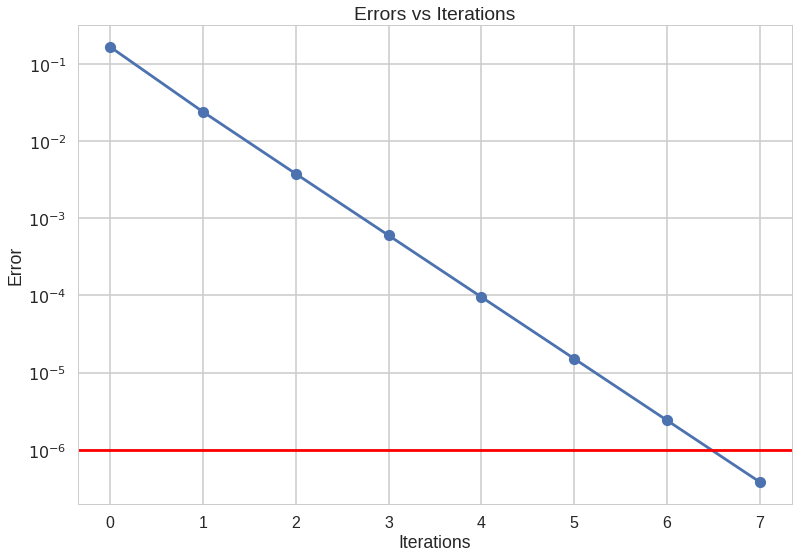

In [15]:
plt.plot(range(len(u)), u, 'o-')
plt.yscale('log')
plt.axhline(e, 0, 1, color='r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Errors vs Iterations');

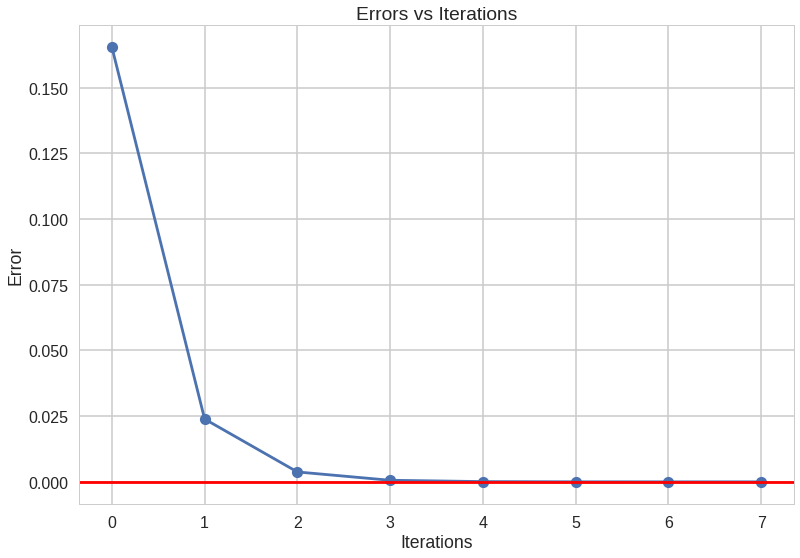

In [16]:
plt.plot(range(len(u)), u, 'o-')
plt.axhline(e, 0, 1, color='r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Errors vs Iterations');

In [17]:
source_power = t.iloc[0, 3]*t.iloc[0, 5]
Ps = abs(source_power.real)
Qs = abs(source_power.imag)
TPL = t['kW(p.u.)'].sum()
TQL = t['kVar(p.u.)'].sum()
print('Ploss = ', Ps - TPL)
print('Qloss = ', Qs - TQL)

Ploss =  0.00783775754964
Qloss =  0.0103647320544
